Importing Libraries

In [3]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.tight_layout()
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

# sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

# remove warnings
import warnings
warnings.filterwarnings('ignore')
print('Successfully Load Libraries')

Successfully Load Libraries


<Figure size 640x480 with 0 Axes>

In [4]:
# read data and remove unnecessary column
df = pd.read_csv("/content/Advertising.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

print('Successfully Read Data')

Successfully Read Data


In [5]:
# data head
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# data summary
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Missing Values

In [7]:
# check for missing values
print(df.isnull().sum())

print("\nData has no missing values")

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Data has no missing values


In [8]:
# check for duplicates
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


Outliers

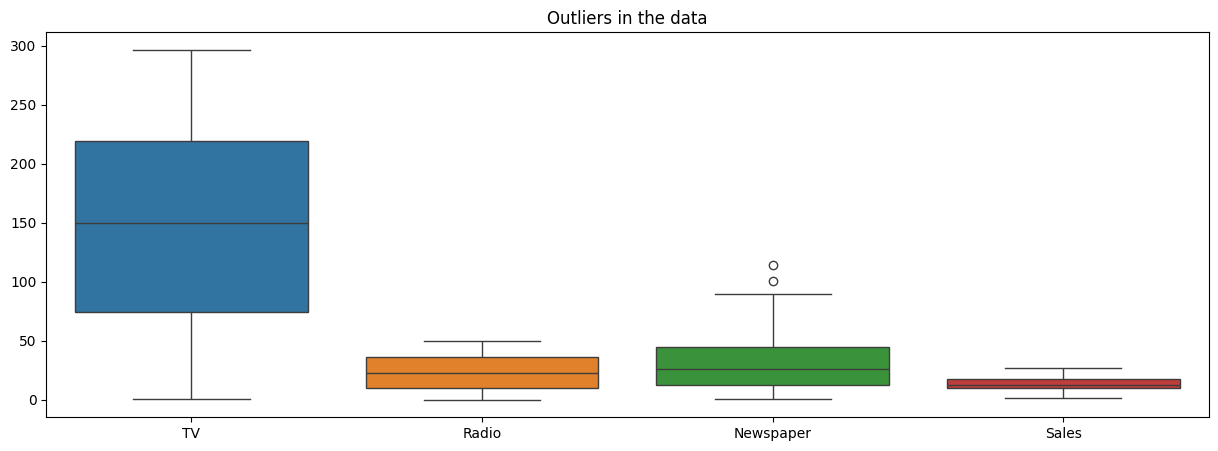

In [9]:
# check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

In [10]:
# show outlier rows in the data
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df[(df["Newspaper"] > (Q3["Newspaper"] + 1.5 * IQR["Newspaper"]))]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


After removing outliers:


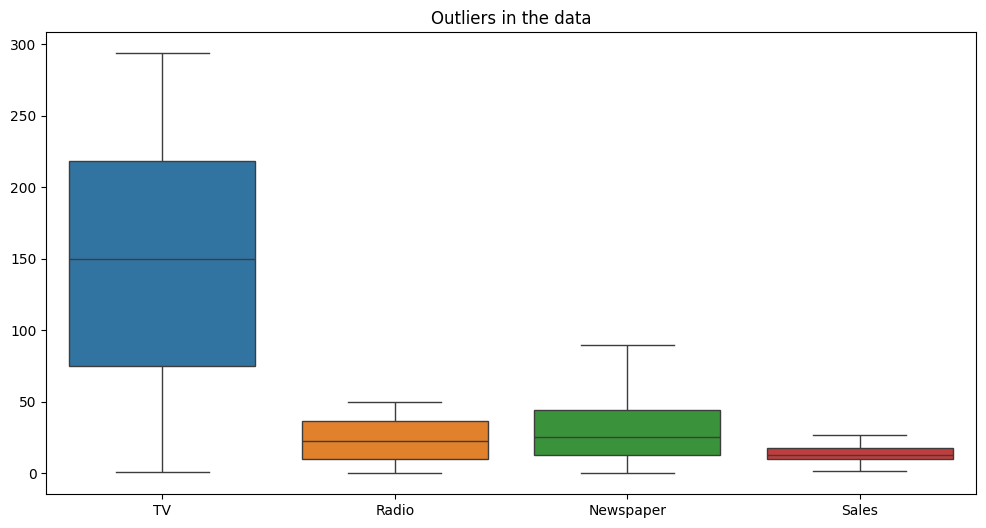

In [11]:
# remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print('After removing outliers:')

# check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

Analysis on Independet Features

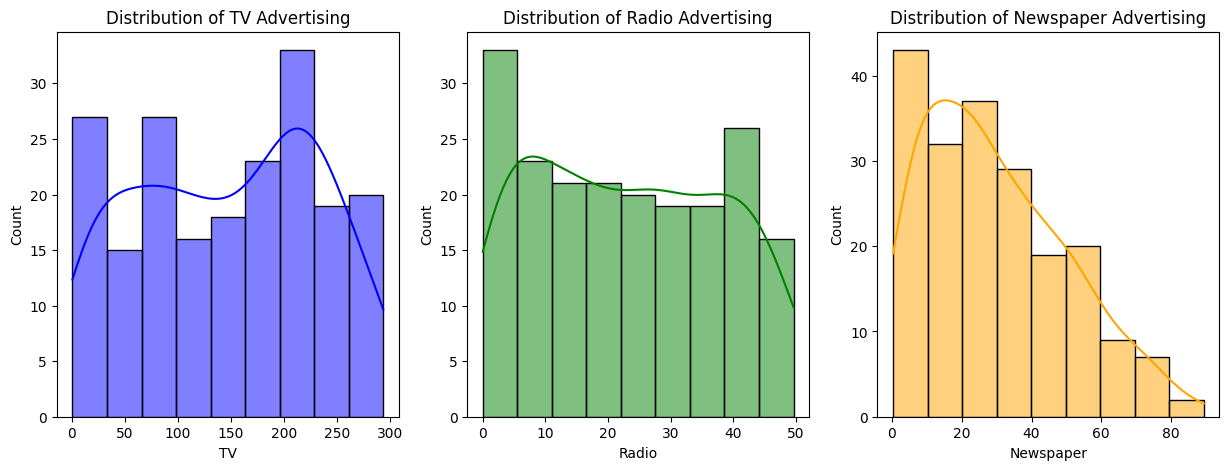

In [12]:
# Plot histograms for independent variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='blue')
plt.title('Distribution of TV Advertising')

plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Advertising')

plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='orange')
plt.title('Distribution of Newspaper Advertising')

plt.show()

Skewness

In [13]:
# find skewness
print("Skewness in TV column:", df["TV"].skew())
print("Skewness in Radio column:", df["Radio"].skew())
print("Skewness in Newspaper column:", df["Newspaper"].skew())

# Interpretation of skewness values
print("\nInterpretation of Skewness : ")
print("Skewness > 0: Right skewed distribution (positive skew)")
print("Skewness = 0: Symmetrical distribution")
print("Skewness < 0: Left skewed distribution (negative skew)")

Skewness in TV column: -0.08233208466403653
Skewness in Radio column: 0.11484208726730326
Skewness in Newspaper column: 0.650111551724088

Interpretation of Skewness : 
Skewness > 0: Right skewed distribution (positive skew)
Skewness = 0: Symmetrical distribution
Skewness < 0: Left skewed distribution (negative skew)


Kurtosis

In [14]:
# find kurtosis
print("Kurtosis in TV column:", df["TV"].kurtosis())
print("Kurtosis in Radio column:", df["Radio"].kurtosis())
print("Kurtosis in Newspaper column:", df["Newspaper"].kurtosis())
print("Kurtosis in Sales column:", df["Sales"].kurtosis())

# Interpretation of kurtosis values
print("\nInterpretation of Kurtosis:")
print("Kurtosis > 3: Leptokurtic distribution (heavy tails)")
print("Kurtosis = 3: Mesokurtic distribution (normal distribution)")
print("Kurtosis < 3: Platykurtic distribution (light tails)")

Kurtosis in TV column: -1.2265360653240356
Kurtosis in Radio column: -1.2523978830692584
Kurtosis in Newspaper column: -0.33298368090117947
Kurtosis in Sales column: -0.39038261264334295

Interpretation of Kurtosis:
Kurtosis > 3: Leptokurtic distribution (heavy tails)
Kurtosis = 3: Mesokurtic distribution (normal distribution)
Kurtosis < 3: Platykurtic distribution (light tails)


Features Relationship with target variable

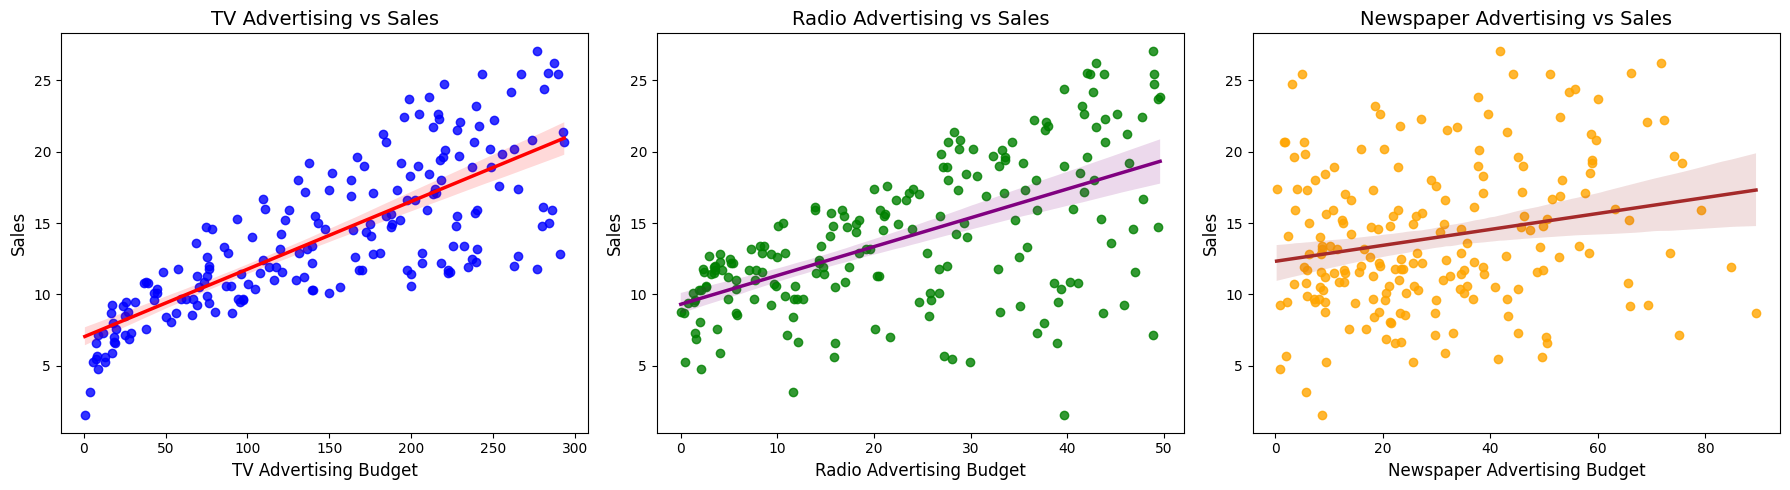

In [15]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# LM plot for TV vs Sales
sns.regplot(x='TV', y='Sales', data=df,
            scatter_kws={'color': 'blue', 'alpha': 0.8},
            line_kws={'color': 'red', 'linewidth': 2.5},
            ax=axes[0])
axes[0].set_title('TV Advertising vs Sales', fontsize=14)
axes[0].set_xlabel('TV Advertising Budget', fontsize=12)
axes[0].set_ylabel('Sales', fontsize=12)

# LM plot for Radio vs Sales
sns.regplot(x='Radio', y='Sales', data=df,
            scatter_kws={'color': 'green', 'alpha': 0.8},
            line_kws={'color': 'purple', 'linewidth': 2.5},
            ax=axes[1])
axes[1].set_title('Radio Advertising vs Sales', fontsize=14)
axes[1].set_xlabel('Radio Advertising Budget', fontsize=12)
axes[1].set_ylabel('Sales', fontsize=12)

# LM plot for Newspaper vs Sales
sns.regplot(x='Newspaper', y='Sales', data=df,
            scatter_kws={'color': 'orange', 'alpha': 0.8},
            line_kws={'color': 'brown', 'linewidth': 2.5},
            ax=axes[2])
axes[2].set_title('Newspaper Advertising vs Sales', fontsize=14)
axes[2].set_xlabel('Newspaper Advertising Budget', fontsize=12)
axes[2].set_ylabel('Sales', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()

Distribution

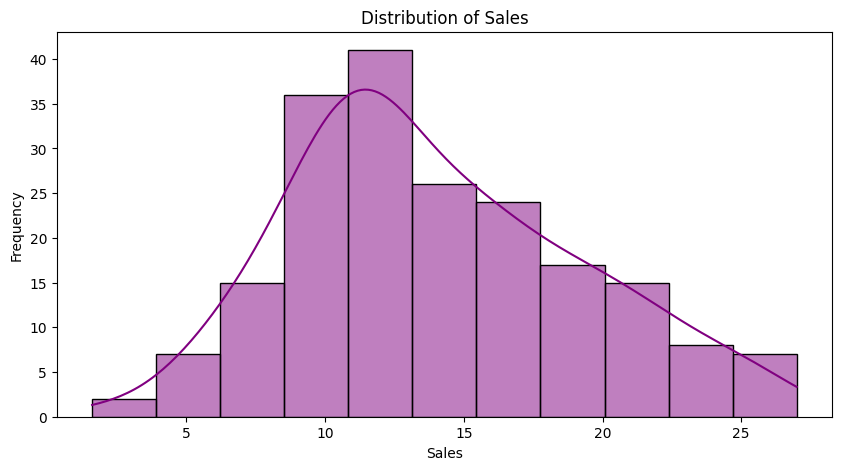

In [16]:
# Plot histogram for the target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Skewness & Kurtosis

In [17]:
# Calculate skewness and kurtosis
sales_skewness = df['Sales'].skew()
sales_kurtosis = df['Sales'].kurtosis()

print(f"Skewness of Sales: {sales_skewness}")
print(f"Kurtosis of Sales: {sales_kurtosis}")

Skewness of Sales: 0.4071300154120368
Kurtosis of Sales: -0.39038261264334295


Transformation

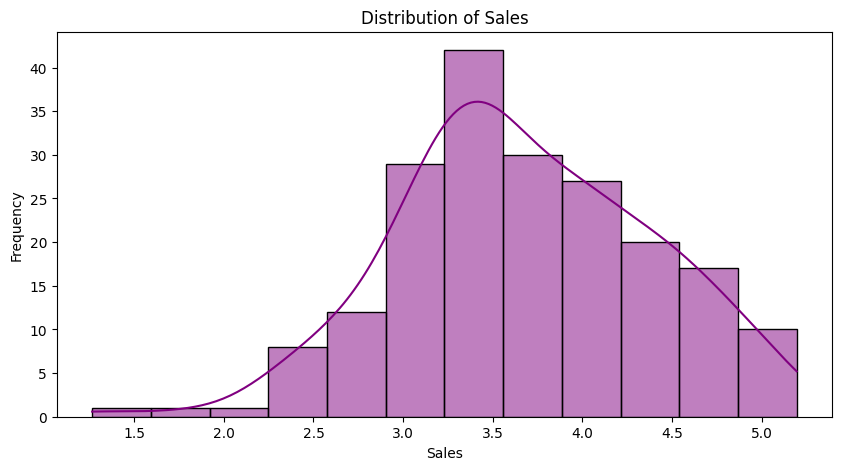

In [18]:
# Apply square root transformation on target variable
df['Sales']= np.sqrt(df['Sales']).round(4)

# check distribution after applying square root transformation
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Skewness & Kurtosis After Transformation

In [19]:
# Calculate skewness and kurtosis after applying transformation
sales_skewness = df['Sales'].skew()
sales_kurtosis = df['Sales'].kurtosis()

print('After applying square root transformation \n')
print(f"Skewness of Sales: {sales_skewness}")
print(f"Kurtosis of Sales: {sales_kurtosis}")

After applying square root transformation 

Skewness of Sales: -0.10228049018046029
Kurtosis of Sales: -0.042391862218277954


Features Creation

In [20]:
# Feature Engineering: Create new features
df["Total_Advertising"] = df["TV"] + df["Radio"] + df["Newspaper"]
df["TV_Radio_Interaction"] = df["TV"] * df["Radio"]

print('Successfully created new features')

Successfully created new features


Correlation

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales,Total_Advertising,TV_Radio_Interaction
TV,1.000000,0.051978,0.049771,0.793426,0.948643,0.656111
Radio,0.051978,1.000000,0.346364,0.535888,0.286933,0.684107
Newspaper,0.049771,0.346364,1.000000,0.212719,0.324576,0.240622
Sales,0.793426,0.535888,0.212719,1.000000,0.871142,0.923616
Total_Advertising,0.948643,0.286933,0.324576,0.871142,1.000000,0.773712
TV_Radio_Interaction,0.656111,0.684107,0.240622,0.923616,0.773712,1.000000


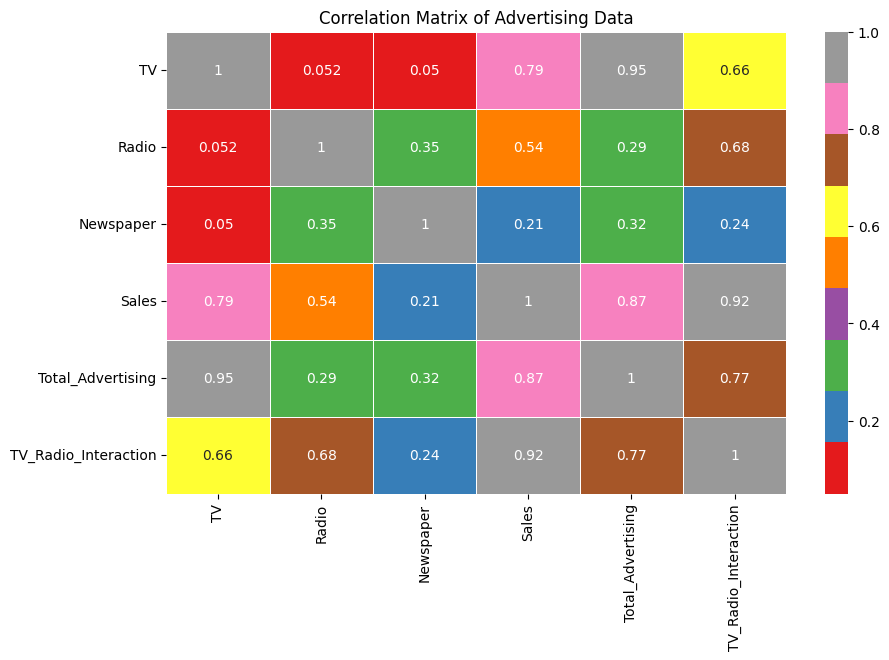

In [22]:
# Display the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set1', linewidths=0.5)
plt.title('Correlation Matrix of Advertising Data')
plt.show()

**Build ML Model**

In [23]:
# Split the data
X = df.drop("Sales", axis=1)
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())  # Normalize features
])
# Define models and their hyperparameter grids
models = {
    "linear_regression": (LinearRegression(), {}),
    "ridge_regression": (Ridge(), {"ridge_regression__alpha": [0.1, 1.0, 10.0]}),
    "lasso_regression": (Lasso(), {"lasso_regression__alpha": [0.1, 1.0, 10.0]}),
    "decision_tree": (DecisionTreeRegressor(random_state=42), {"decision_tree__max_depth": [5, 10, 20]}),
    "random_forest": (RandomForestRegressor(random_state=42), {"random_forest__n_estimators": [50, 100], "random_forest__max_depth": [10, 20]}),
    "gradient_boosting": (GradientBoostingRegressor(random_state=42), {"gradient_boosting__n_estimators": [50, 100], "gradient_boosting__learning_rate": [0.1, 0.2]}),
    "support_vector_regression": (SVR(), {"support_vector_regression__C": [0.1, 1.0], "support_vector_regression__kernel": ["linear", "rbf"]}),
    "k_nearest_neighbors": (KNeighborsRegressor(), {"k_nearest_neighbors__n_neighbors": [3, 5, 7]}),
    "xgboost": (XGBRegressor(random_state=42), {"xgboost__n_estimators": [50, 100], "xgboost__learning_rate": [0.1, 0.2]})
}
# Create a pipeline for each model and perform hyperparameter tuning
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        (model_name, model)
    ])

     # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")
    grid_search.fit(X_train, y_train)

    # Evaluate the model
    y_pred = grid_search.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "Best Parameters": grid_search.best_params_,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }
  # Sort the results by RMSE in ascending order
sorted_results = sorted(results.items(), key=lambda x: x[1]["RMSE"])

# Print sorted results
print("\nModel Evaluation Results (Sorted by RMSE in Ascending Order):")
for model_name, result in sorted_results:
    print(f"{model_name}:")
    print(f"  Best Parameters: {result['Best Parameters']}")
    print(f"  MAE: {result['MAE']}")
    print(f"  MSE: {result['MSE']}")
    print(f"  RMSE: {result['RMSE']}")
    print(f"  R²: {result['R²']}")
    print()

# Display the best model with all metrics
best_model_name = sorted_results[0][0]
best_model_result = sorted_results[0][1]
print("\nBest Model:")
print(f"{best_model_name}:")
print(f"  Best Parameters: {best_model_result['Best Parameters']}")
print(f"  MAE: {best_model_result['MAE']}")
print(f"  MSE: {best_model_result['MSE']}")
print(f"  RMSE: {best_model_result['RMSE']}")
print(f"  R²: {best_model_result['R²']}")


Training linear_regression...
Training ridge_regression...
Training lasso_regression...
Training decision_tree...
Training random_forest...
Training gradient_boosting...
Training support_vector_regression...
Training k_nearest_neighbors...
Training xgboost...

Model Evaluation Results (Sorted by RMSE in Ascending Order):
xgboost:
  Best Parameters: {'xgboost__learning_rate': 0.2, 'xgboost__n_estimators': 100}
  MAE: 0.06421262337684634
  MSE: 0.007091345935950952
  RMSE: 0.0842101296516693
  R²: 0.9854859293398803

gradient_boosting:
  Best Parameters: {'gradient_boosting__learning_rate': 0.2, 'gradient_boosting__n_estimators': 100}
  MAE: 0.07008569909928528
  MSE: 0.007286678059980148
  RMSE: 0.08536204109544328
  R²: 0.98508613721636

random_forest:
  Best Parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 100}
  MAE: 0.06874382499999968
  MSE: 0.008146557820174986
  RMSE: 0.0902582839421124
  R²: 0.9833261954914185

decision_tree:
  Best Parameters: {'decis

**Prediction using Linear Regression Model**

In [24]:
# Model Preparation
X = df.drop('Sales', axis=1)
y = df[["Sales"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

# Linear Regression Model
lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

# Define a list of models to evaluate
models = [('LinearRegression', LinearRegression())]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: RMSE = {rmse:.2f}")

LinearRegression: RMSE = 0.22


In [25]:
# Linear Regression Model

lin_model = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()
# Make predictions on new data
new_data_1 = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales_1 = lin_model.predict(new_data_1)
print("Predicted Sales (Data 1):", predicted_sales_1)

Predicted Sales (Data 1): 0    4.00788
dtype: float64


**Prediction using XGboost Model**

In [29]:
# Generate additional features
df['Total_Advertising'] = df['TV'] + df['Radio'] + df['Newspaper']
df['TV_Radio_Interaction'] = df['TV'] * df['Radio']

# Define features and target variable
X = df[['TV', 'Radio', 'Newspaper', 'Total_Advertising', 'TV_Radio_Interaction']]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model with optimized parameters
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=20, learning_rate=0.1, max_depth=2)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost: RMSE = {rmse:.2f}")

# Prepare new data for prediction
new_data_1 = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
new_data_1['Total_Advertising'] = new_data_1['TV'] + new_data_1['Radio'] + new_data_1['Newspaper']
new_data_1['TV_Radio_Interaction'] = new_data_1['TV'] * new_data_1['Radio']

# Predict sales for the new data point
predicted_sales_1 = xgb_model.predict(new_data_1)
print("Predicted Sales (Data 1):", predicted_sales_1)

XGBoost: RMSE = 0.16
Predicted Sales (Data 1): [3.8554342]
